In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

### TRAIN
        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [2]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [3]:
test_input = pd.read_csv('/home/dissertation/data/sample_submission_v2.csv', 
                          dtype = {'msno' : 'category'})
test_input.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [4]:
train_input.is_churn.value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [5]:
np.mean(train_input.is_churn)

0.08994191315811156

In [6]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null category
is_churn    970960 non-null int64
dtypes: category(1), int64(1)
memory usage: 58.5 MB


 0    883630
1     87330
Name: is_churn, dtype: int64


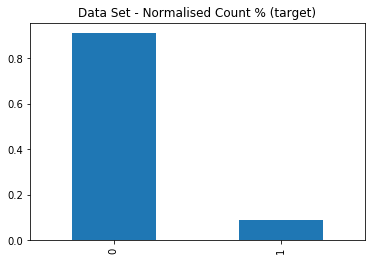

In [7]:
train_input.is_churn.value_counts(dropna=False, normalize=True).plot(kind='bar', title='Data Set - Normalised Count % (target)')
print("",train_input.is_churn.value_counts())

In [11]:
train_input.is_churn.value_counts(normalize=True)

0   0.91
1   0.09
Name: is_churn, dtype: float64

[Text(0, 0.5, '%'), Text(0.5, 0, 'Churned')]

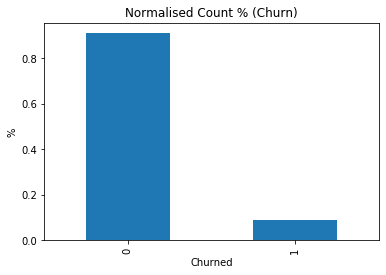

In [12]:
ax = train_input.is_churn\
        .value_counts(dropna=False, normalize=True)\
        .plot(kind='bar', title='Normalised Count % (Churn)')
ax.set(xlabel="Churned", ylabel="%")

In [13]:
train_input.describe(include='all')

,msno,is_churn
count,970960,970960.00
unique,970960,nan
top,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,nan
freq,1,nan
mean,NaN,0.09
std,NaN,0.29
min,NaN,0.00
25%,NaN,0.00
50%,NaN,0.00
75%,NaN,0.00


So we have churn records for 970960 members

### MEMBERS

In [14]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv',
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str,
                                   'city' : 'category',
                                   'registered_via' : 'category'})

In [15]:
members_input['registration_init_time_dt'] = pd.to_datetime(members_input['registration_init_time'], 
                                                            format='%Y%m%d', errors='ignore')

In [16]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15


In [17]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,6769473,6769473,6769473.00,2339968,6769473,6769473.00,6769473
unique,6769473,21,nan,2,18,nan,4782
top,Ql63aoGdwhl7p6oZ6ZXZfvGLcgvTvObLxgYCbcqCVu0=,1,nan,male,4,nan,2015-10-09 00:00:00
freq,1,4804326,nan,1195355,2793213,nan,12413
first,NaN,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,NaN,nan,NaN,NaN,nan,2017-04-29 00:00:00
mean,NaN,NaN,9.80,NaN,NaN,20145175.91,NaN
std,NaN,NaN,17.93,NaN,NaN,23186.01,NaN
min,NaN,NaN,-7168.00,NaN,NaN,20040326.00,NaN
25%,NaN,NaN,0.00,NaN,NaN,20140422.00,NaN


#### BD: Age of member

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e7feb5518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e7feb52e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e7feb5c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e7e61a898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e7e61a588>],
 'means': []}

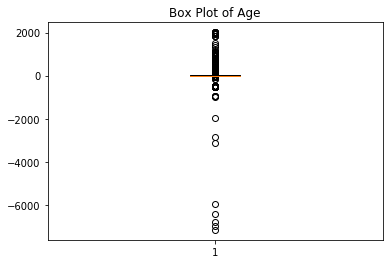

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input['bd'])

In [19]:
upper_q = .99
lower_q = .01
upper_price_outlier = members_input['bd'].quantile(upper_q)
lower_price_outlier = members_input['bd'].quantile(lower_q)
print("Using {0} and {1} quantiles would suggest {2} and {3} as the upper and lower bounds of bd".format(upper_q, lower_q, upper_price_outlier, max(0, lower_price_outlier)))
print("This method would  exclude {0} instances".format(len(members_input[~members_input.bd.between(lower_price_outlier, upper_price_outlier)])))
print("Very inconsistent/noisy data in this feature. Needs to be processed somehow")

Using 0.99 and 0.01 quantiles would suggest 54.0 and 0 as the upper and lower bounds of bd
This method would  exclude 62658 instances
Very inconsistent/noisy data in this feature. Needs to be processed somehow


#### Categorical Features

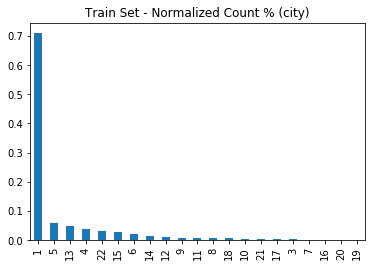

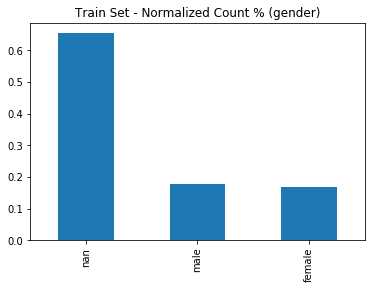

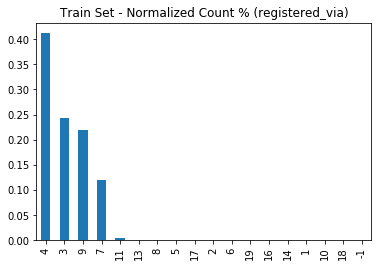

In [20]:
for idx, col in enumerate(['city','gender','registered_via']):
    plt.figure()
    members_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (~ 70%)
    A large portion (>60%) of gender information is missing
    There are 4 main popular approaches to registering, [4, 3, 9, 7]. The rest are minimal

#### TRANSACTIONS

In [ ]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

In [ ]:
transactions_input.plan_list_price.value_counts().plot(kind='bar')

In [ ]:
transactions_input.describe(include='all')

In [ ]:
plt.hist(transactions_input.actual_amount_paid, bins=50)

In [ ]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    most transactions are for 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription

### Merging train_input and members

In [21]:
merged_input = pd.merge(left=train_input, right=members_input, how='inner', on=['msno'])
merged_input.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25


In [22]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,860967,860967.00,860967,860967.00,388905,860967,860967.00,860967
unique,860967,nan,21,nan,2,5,nan,4749
top,Sh+mS2wHUdg/cqwAyi+q8tO0yxmrTxsYZD75wgBJMVQ=,nan,1,nan,male,7,nan,2015-10-09 00:00:00
freq,1,nan,442598,nan,204561,462684,nan,1575
first,NaN,nan,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,nan,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00
mean,NaN,0.09,NaN,13.58,NaN,NaN,20132648.96,NaN
std,NaN,0.29,NaN,20.06,NaN,NaN,30111.74,NaN
min,NaN,0.00,NaN,-3152.00,NaN,NaN,20040326.00,NaN
25%,NaN,0.00,NaN,0.00,NaN,NaN,20120214.00,NaN


is_churn,0,1
gender,,
female,0.19,0.03
male,0.21,0.03
nan,0.51,0.04


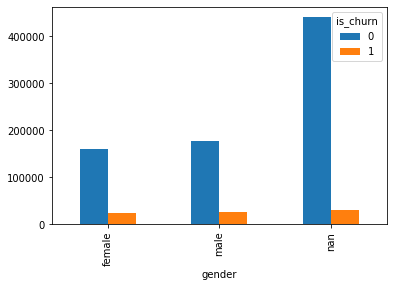

In [23]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(merged_input[merged_input.bd.between(0,100)]['bd'])

In [ ]:
members_input.head()

In [ ]:
transactions_summary.transaction_date_max.max()

### Merging Transactions with those members involved in the churn study

In [ ]:
transactions_merged = pd.merge(left = merged_input[['msno']], 
                               right = transactions_input, 
                               how='left', 
                               on='msno')
transactions_merged.head()

In [ ]:
transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

In [ ]:
%%time
#[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
        .groupby('msno')\
        .agg({'msno' : {'total_order' : 'count'},
                        'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
                                               'payment_method_id_count' : lambda x: len(np.unique(x))},
                        'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
                                               'payment_plan_days_mean' : 'mean'},
                        'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                             'plan_lifetime_value' : 'sum'},
                        'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                'total_actual_amount' : 'sum'},
                        'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
                        'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                              'transaction_date_max' : lambda x: x.max()},
                        'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
            })

In [ ]:
transactions_summary = \
    transactions_merged\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

In [ ]:
transactions_summary.head()

In [ ]:
len(transactions_summary)

In [ ]:
transactions_summary.to_hdf('/home/dissertation/data/transactions_summary.h5', key='transactions_summary', mode='w')